In [1]:
import numpy as np
from scipy.fft import fft, fftfreq
from sourcesep.utils.compute import lowpass

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

In [2]:
rng = np.random.default_rng()
sampling_interval = 0.02
t = np.arange(500) * sampling_interval

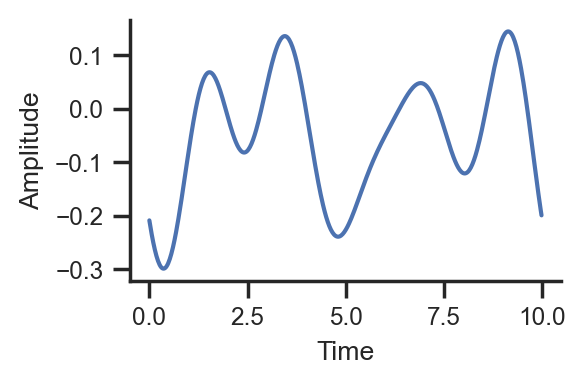

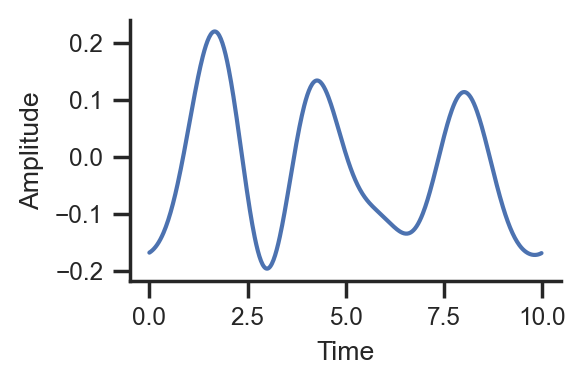

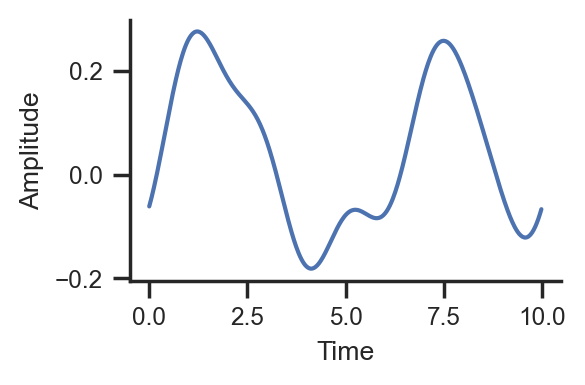

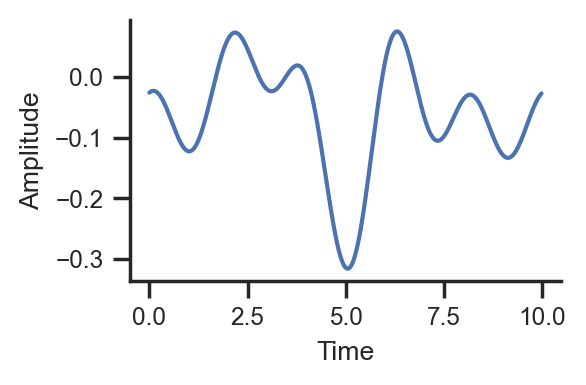

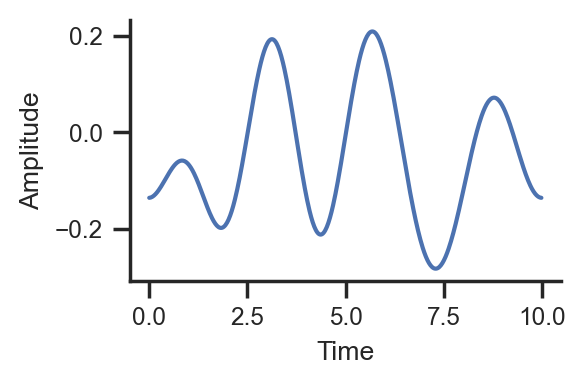

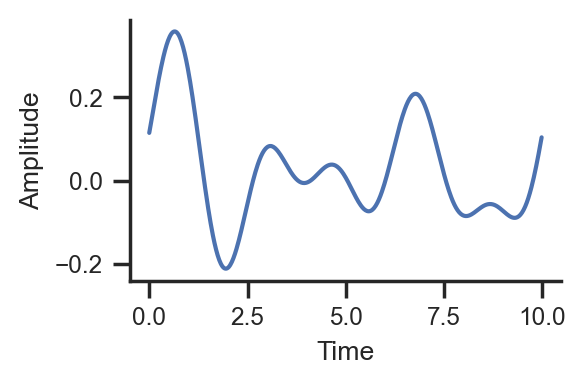

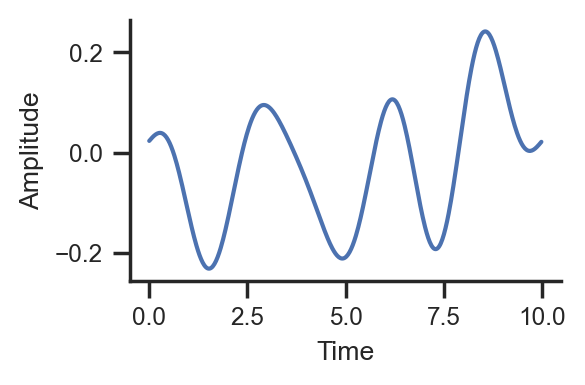

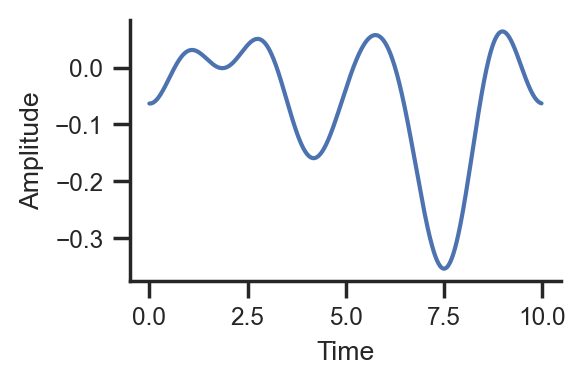

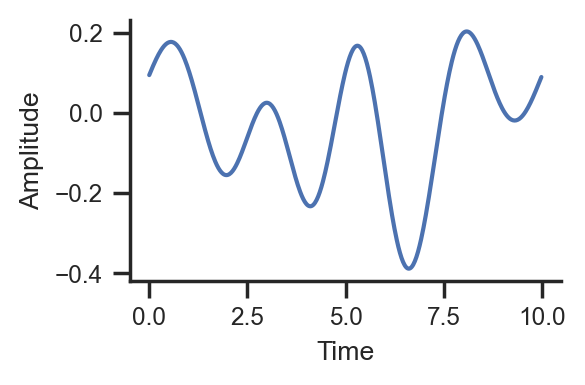

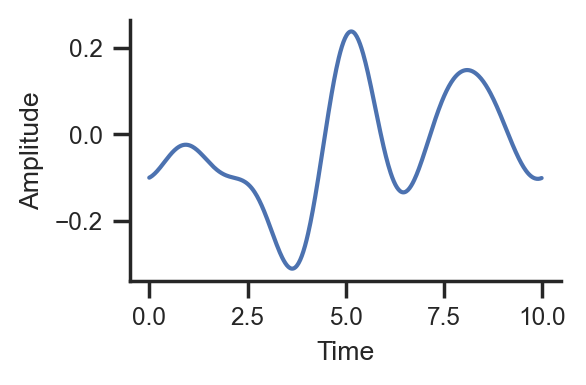

In [3]:
for i in range(10):
    xt = rng.standard_normal(size=(np.size(t),))  # + 1*np.sin(2*np.pi*0.5*t)

    xt_filt = lowpass(xt=xt, sampling_interval=sampling_interval, pass_below=0.5)

    _, ax = plt.subplots(1, 1, figsize=(3, 2))
    ax.plot(t, xt_filt)
    ax.set(xlabel="Time", ylabel="Amplitude")
    plt.tight_layout()
    plt.show()

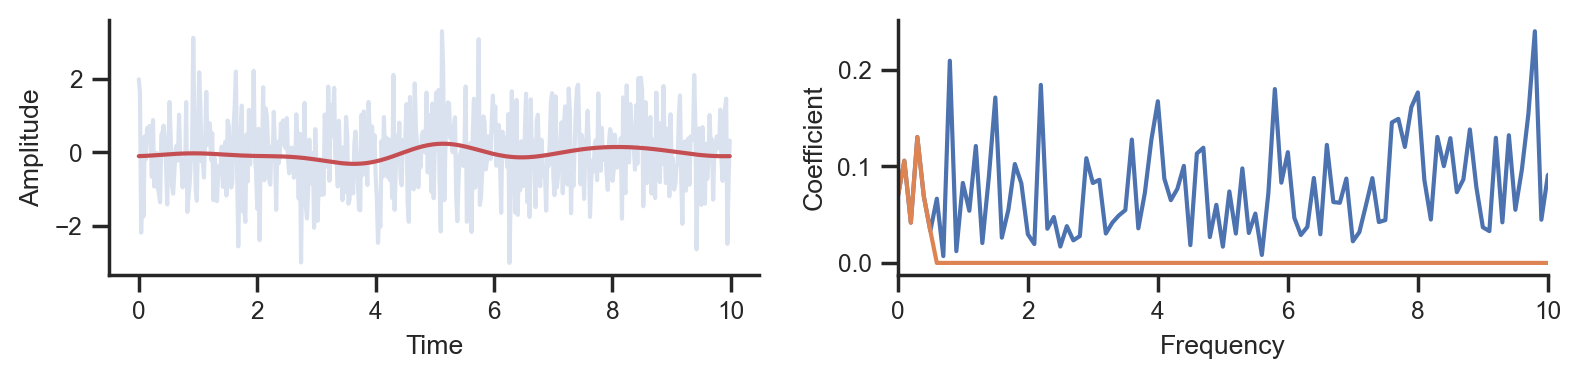

In [4]:
# calculate fft
xf = fft(xt)
xf_filt = fft(xt_filt)
f = fftfreq(xt.size, sampling_interval)[: (xt.size // 2)]

_, ax = plt.subplots(1, 2, figsize=(8, 2))
ax[0].plot(t, xt, alpha=0.2)
ax[0].plot(t, xt_filt, color="r")
ax[0].set(xlabel="Time", ylabel="Amplitude")

ax[1].plot(f, (2.0 / xt.size) * np.abs(xf[0 : (xt.size // 2)]))
ax[1].plot(f, (2.0 / xt.size) * np.abs(xf_filt[0 : (xt.size // 2)]))
ax[1].set(xlabel="Frequency", ylabel="Coefficient", xlim=(0, 10))
plt.tight_layout()
plt.show()

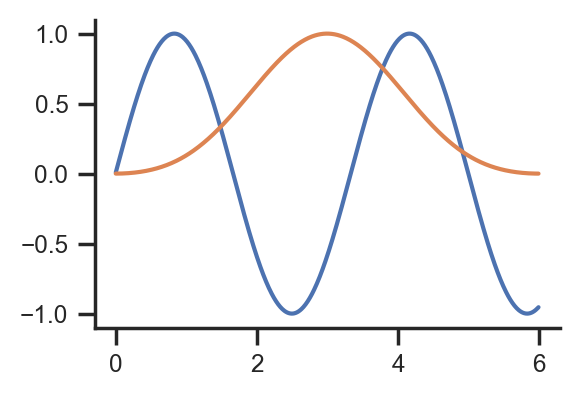

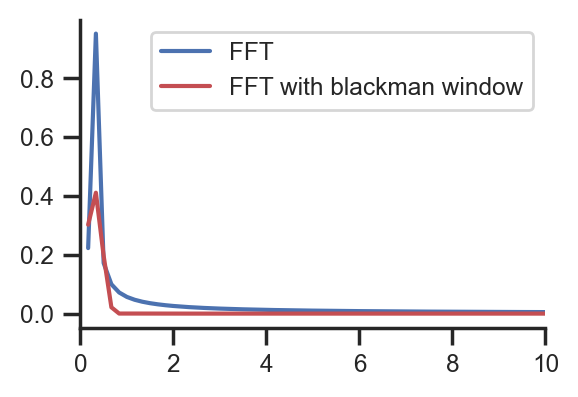

In [5]:
# Understand windowing
from scipy.signal.windows import blackman

# Number of sample points
N = 600
T = 0.01

w = blackman(N)
x = np.linspace(0.0, N * T, N, endpoint=False)
y = 1 * np.sin(0.3 * 2.0 * np.pi * x + 0.008)  # + 0.5*np.sin(0.6 * 2.0*np.pi*x)
yf = fft(y)
_, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(x, y, label="signal")
ax.plot(x, w, label="signal")
plt.show()


ywf = fft(y * w)
xf = fftfreq(N, T)[: N // 2]
_, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(xf[1 : N // 2], 2.0 / N * np.abs(yf[1 : N // 2]), "-b", label="FFT")
ax.plot(xf[1 : N // 2], 2.0 / N * np.abs(ywf[1 : N // 2]), "-r", label="FFT with blackman window")
ax.set(xlim=(0, 10))
plt.legend()
plt.show()